In [1]:
import sys
%matplotlib inline
import numpy as np
import os
import matplotlib.pyplot
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.ticker as mticker
import matplotlib.dates as mdates
import datetime
from tqdm import tqdm
import GPy
from collections import defaultdict
from pathlib import Path
import seaborn as sns
import scipy.stats as stats
from matplotlib.colors import ListedColormap
import warnings
import time
from itertools import product
from joblib import Parallel, delayed

mpl.rcParams['legend.frameon'] = False
mpl.rcParams['figure.autolayout'] = True
# mpl.rcParams['figure.dpi'] = 300
# mpl.rcParams['axes.spines.right'] = False
# mpl.rcParams['axes.spines.top'] = False


plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": ["Helvetica"]})

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Palatino"],
})


def utkarshGrid():
    plt.minorticks_on()
    plt.grid(color='grey',
             which='minor',
             linestyle=":",
             linewidth='0.1',
             )
    plt.grid(color='black',
             which='major',
             linestyle=":",
             linewidth='0.1',
             )

In [2]:
import random
random.seed(3)

%run Classes.ipynb

[STATUS] Reference Saved
[STATUS] Skipping Tests


In [3]:
data = LightCurve("reference.csv")
phi_range = [30]
mejdyn_range = [0.01]
mejwind_range = [0.11]
data.select_curve(phiRange = phi_range, mejdynRange = mejdyn_range, mejwindRange = mejwind_range)
data.selected
zBand = 900.0
data.extract_curve()
data.curve.head(2) # iobs goes from 0 --> 10 (11 rows)
# data.simple_plot(zBand)
# data.plot_viewingangle_simple()

wavelength,10.0,30.0,50.0,70.0,90.0,110.0,130.0,150.0,170.0,190.0,...,9810.0,9830.0,9850.0,9870.0,9890.0,9910.0,9930.0,9950.0,9970.0,9990.0
iobs,,,,,,,,,,,,,,,,,,,,,
0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[4.1465e-07, 1.3883e-06, 1.7753e-07, 2.6052e-0...","[9.1683e-06, 4.4819e-05, 9.8855e-06, 1.1481e-0...","[8.3714e-05, 0.00025517, 8.129e-05, 2.384e-05,...","[0.00028939, 0.00085966, 0.00025527, 0.0001117...","[0.00060159, 0.0015886, 0.0007023, 0.0002723, ...","[0.00079509, 0.0030784, 0.00080502, 0.00050972...","[0.0008913, 0.00566, 0.0013939, 0.00056179, 0....","[0.0008789, 0.0050446, 0.0013068, 0.00060908, ...",...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00026573...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4.768...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.311...","[0.0, 0.0, 0.0, 6.4979e-08, 0.0, 0.0, 6.7402e-...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[1.5032e-07, 1.4652e-06, 1.9802e-07, 2.5081e-0...","[8.0978e-06, 4.489e-05, 1.0097e-05, 0.00090249...","[8.3075e-05, 0.00025799, 8.0892e-05, 2.4247e-0...","[0.00029871, 0.00092469, 0.0002547, 0.0001111,...","[0.00058962, 0.0018025, 0.00070055, 0.00027331...","[0.00078938, 0.0032975, 0.00080607, 0.00048103...","[0.00088974, 0.0060483, 0.0013921, 0.00056177,...","[0.00087734, 0.0050459, 0.0011036, 0.00063516,...",...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4.749...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 7.0508e-07, 0.0...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 3.217e-08, 0.0, 0.0, 0.0, 0.0,..."


[STATUS] Plotting for nph: [], mejdyn: [0.01], mejwind: [0.11], phi: [30], viewing_angle: [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]


 /Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/IPython/core/pylabtools.py:132: UserWarning:This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


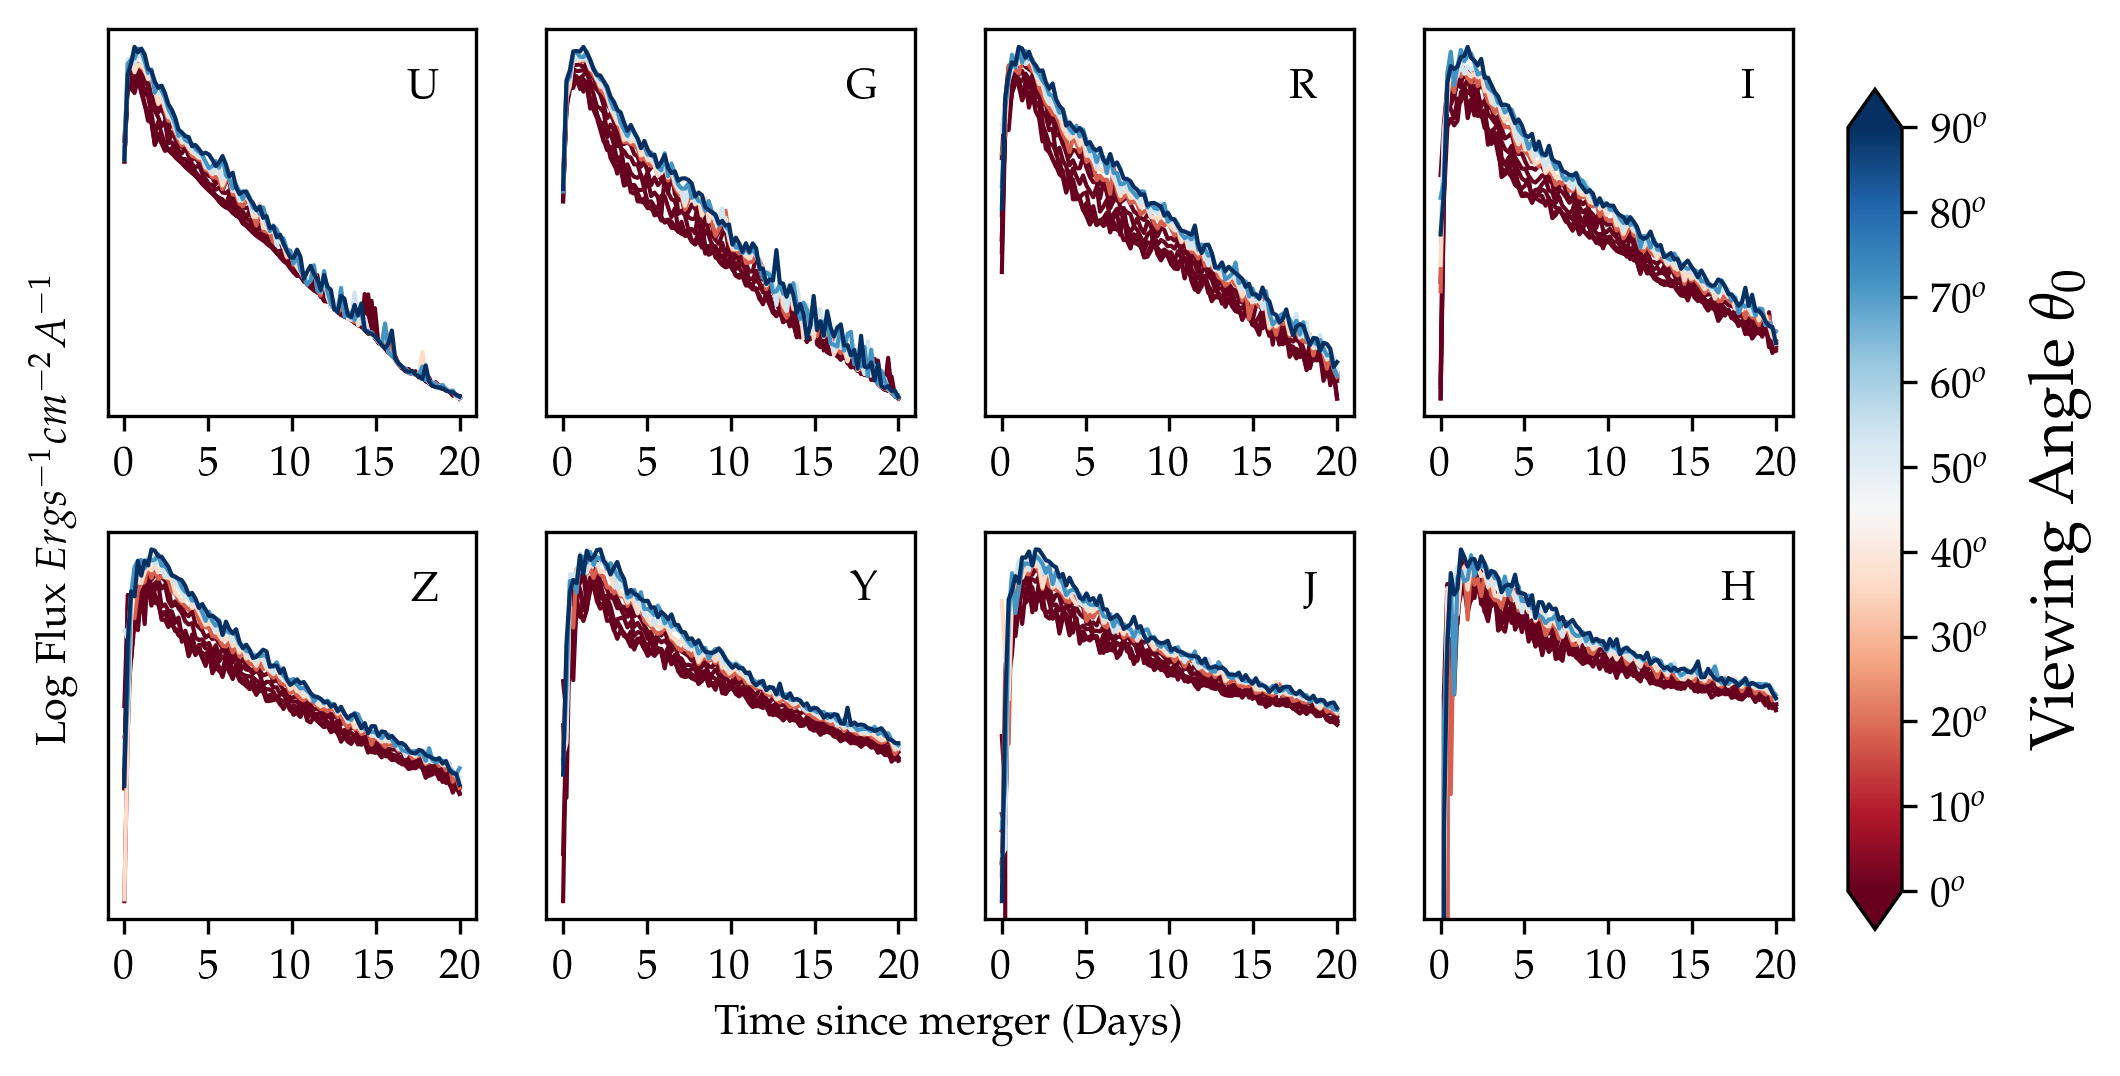

In [4]:
phi_range = [30]
mejdyn_range = [0.01]
mejwind_range = [0.11]
data = LightCurve("reference.csv")
data.select_viewingangle(phi_range, mejdyn_range, mejwind_range, 900)
data.plot_viewingangle()


In [5]:
data = LightCurve("reference.csv")
wv_range = [900]
iobs_range = [0]
phi_range = [45]
mejwind_range = [0.13]
# data.select_mejdyn(wv_range, iobs_range, phi_range, mejwind_range)
# data.mejdyn
# data.plot_mejdyn(verbose = True)

In [6]:
data = LightCurve("reference.csv")
wv_range = [900]
iobs_range = [0]
mejdyn_range = [0.01]
phi_range = [45]
# data.select_mejwind(wv_range, iobs_range, phi_range, mejdyn_range)
# data.mejwind
# data.plot_mejwind(verbose = True)

In [7]:
# data = LightCurve("reference.csv")
# wv_range = [900]
# iobs_range = [0]
# mejdyn_range = [0.01]
# mejwind_range = [0.11]
# data.select_phi(wv_range, iobs_range, mejwind_range, mejdyn_range)
# data.plot_phi(verbose = True)

# Gaussian Process Script

In [8]:
gp = GP("reference.csv")
phi_range = [15]
mejdyn_range = [0.01]
mejwind_range = [0.05]
wv = 1500
gp.range_select_wavelength(phi_range, mejdyn_range, mejwind_range, wv)
# gp.viewingangle

In [9]:
gp.single_time_step(1) # Want distribution at 1 day
gp.time_sliced
# gp.time_sliced_normed
# arr = gp.time_sliced.to_numpy()[0]
# plt.scatter(np.linspace(0,gp.Nobs,len(arr)), arr)

iobs,0,1,2,3,4,5,6,7,8,9,10
time_step,,,,,,,,,,,
5,0.000109,0.000227,0.000183,0.000473,0.001095,0.000828,0.001256,0.000556,0.001347,0.000678,0.001556


In [10]:
gp.normedDF()

In [11]:
gp.setXY_viewingangle()
gp.set_kernel(GPy.kern.RBF(input_dim=1, variance = 2, lengthscale=2))
gp.set_model(GPy.models.GPRegression(gp.X, gp.Y, gp.kernel))

In [12]:
gp.set_predX(np.linspace(0,gp.Nobs,100).reshape(100, 1))

# # Manual
# gp.plot_prior(manual = True, sig = 2)
# gp.plot_covariance()
# cov1 = gp.cov

# # Automatic
# gp.plot_prior(manual = False, title = "Untrained Posterior")
# gp.plot_covariance()
# cov2 = gp.cov

# # Comparison
# print(f"Are covariance matricies equal? {np.allclose(cov1, cov2)}")
# plt.show()

GP_regression.,value,constraints,priors
rbf.variance,2.0,+ve,
rbf.lengthscale,2.0,+ve,
Gaussian_noise.variance,1.0,+ve,


  index  |  GP_regression.rbf.lengthscale  |  constraints  |  priors
  [0]    |                     4.67891113  |      +ve      |        


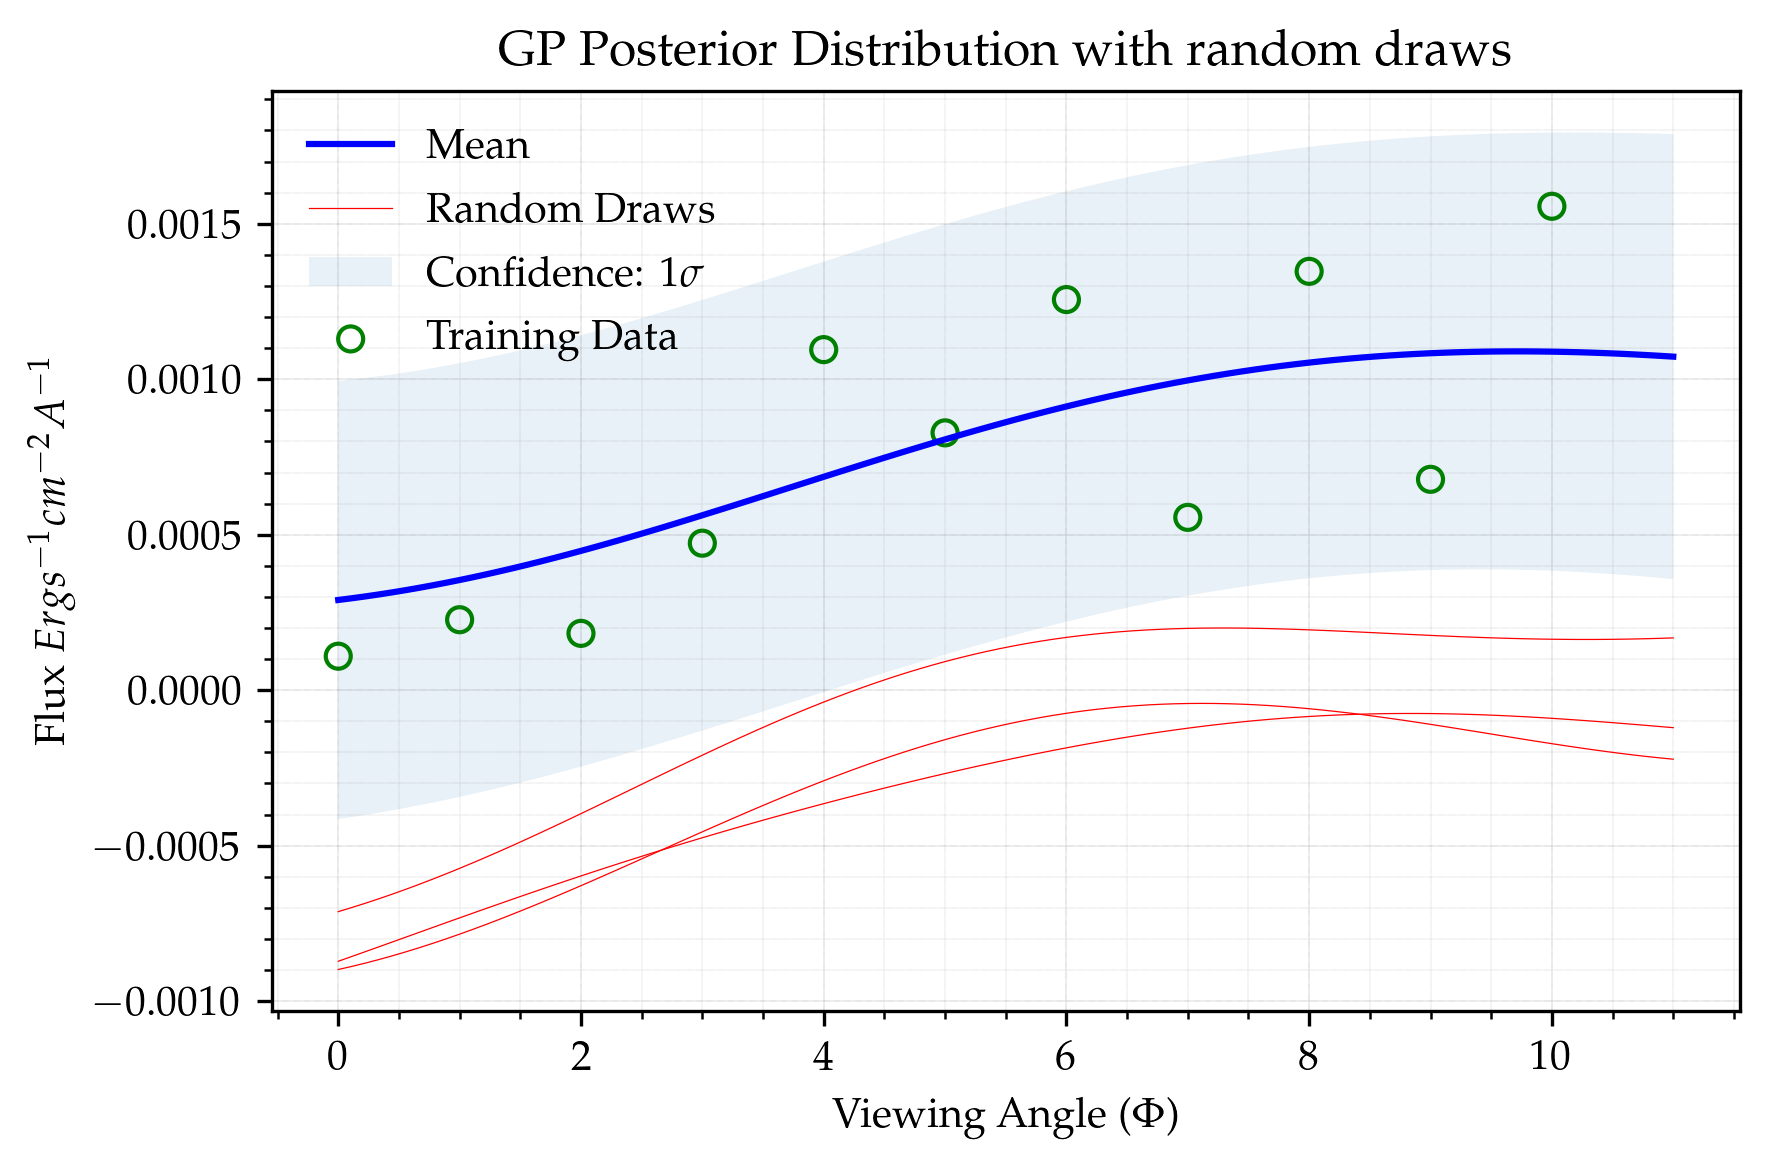

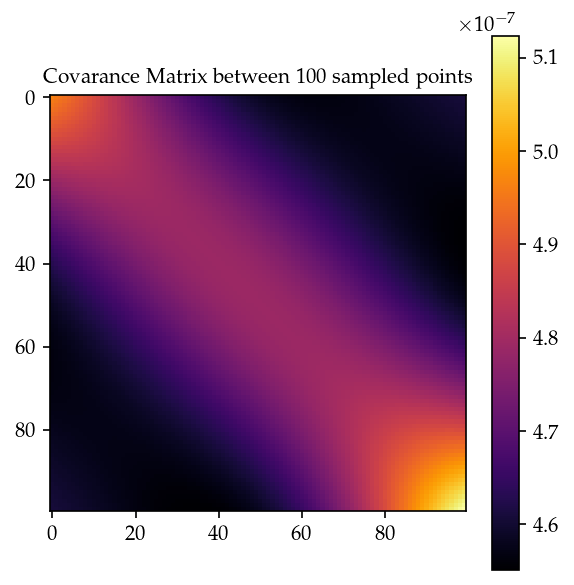

In [13]:
gp.model_train(verbose = True)

# # Manual
# gp.plot_posterior(manual = True)
# gp.plot_covariance()
# cov1 = gp.cov

# Automatic
gp.plot_posterior(manual = False, include_like = False)
# plt.plot(gp.X.T[0], gp.time_sliced.to_numpy()[0], label = "True Data")
plt.legend()
gp.plot_covariance()
cov2 = gp.cov
# Comparison
# print(f"Are covariance matricies equal? {np.allclose(cov1, cov2)}")
# plt.show()

# LOO Cross Validation

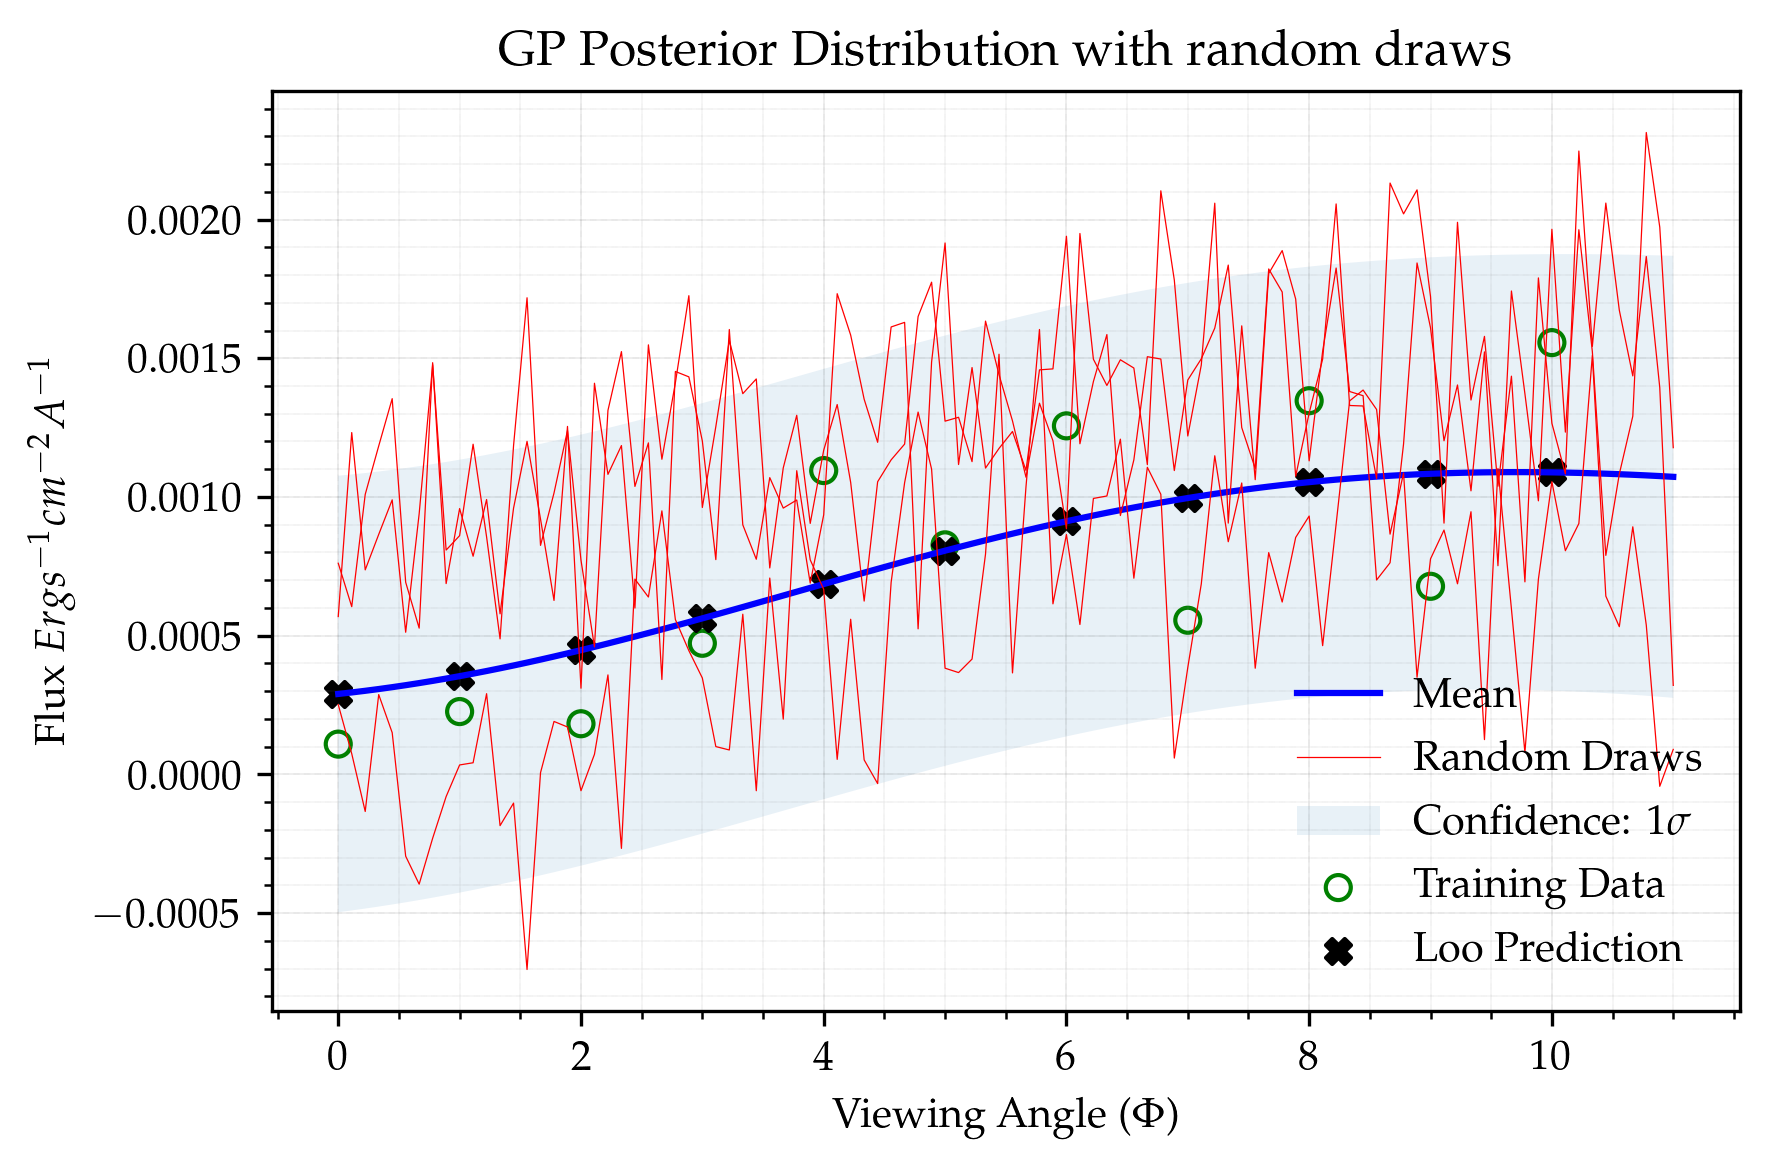

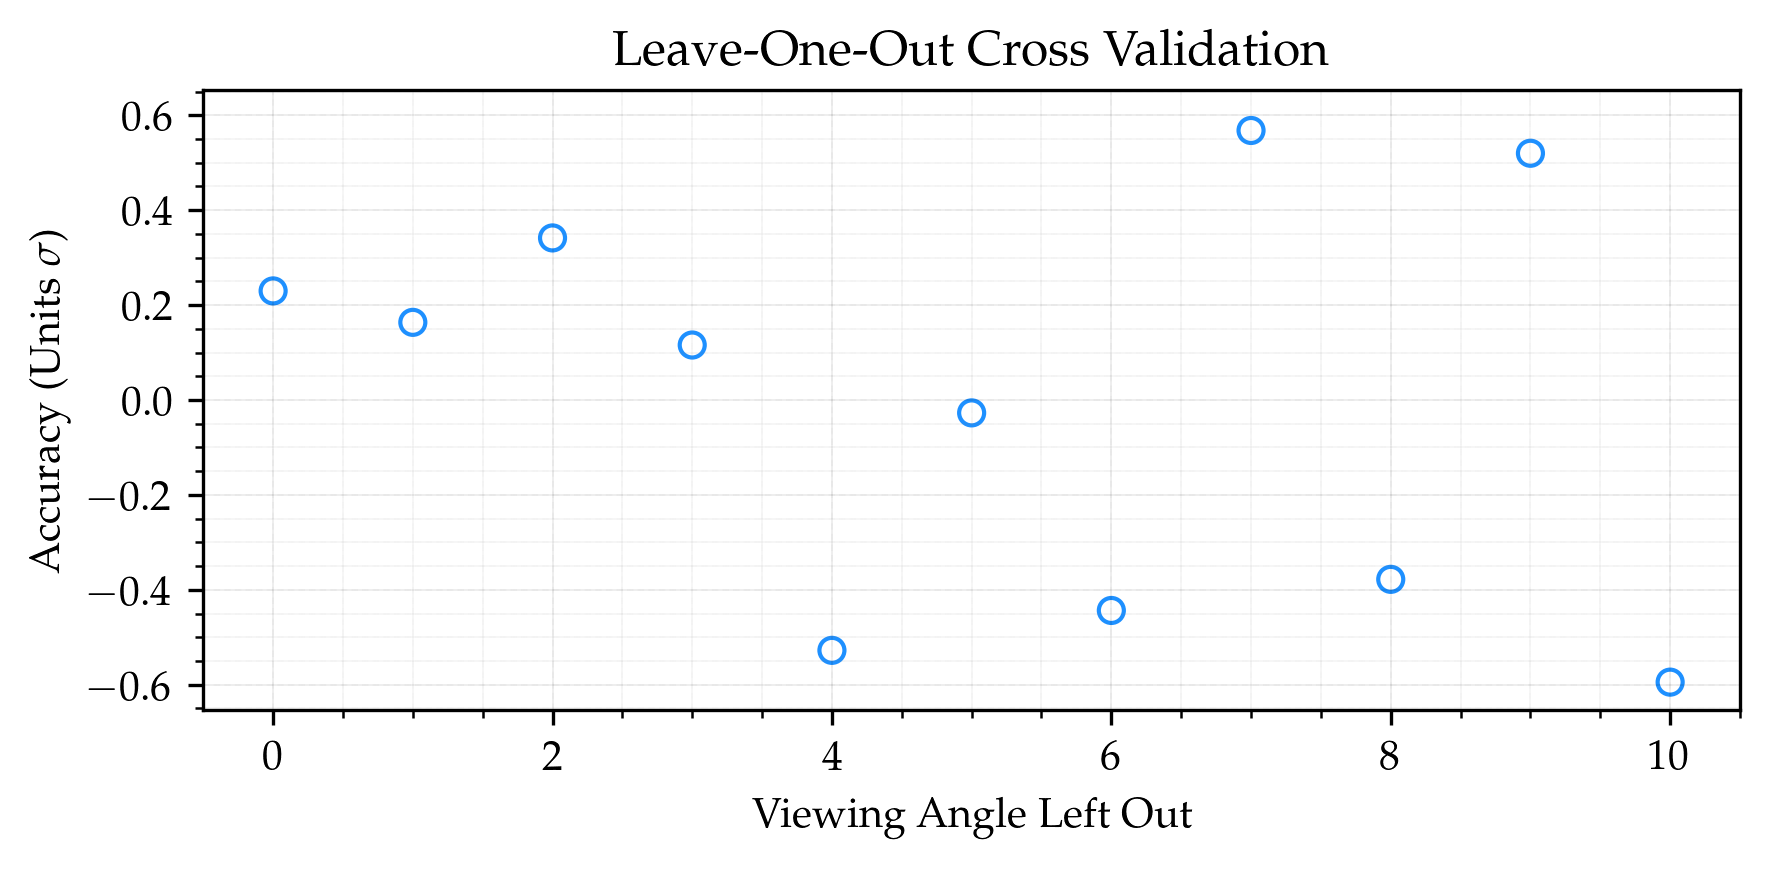

In [14]:
gp.extraction_time = 1
gp.LOOCV()
gp.plot_loocv_simple()
gp.plot_loocv()
# gp.LOOCV(manual = False)

# Multiple GP LOO-CV

In [15]:
gp0 = GP("reference.csv")
gp0.extraction_time = 1
gp0.multiple_LOOCV(N = 1, verbose = True)
gp0.loo_list_multiple.shape

100%|██████████| 1/1 [00:01<00:00,  1.29s/it]


(1, 11)

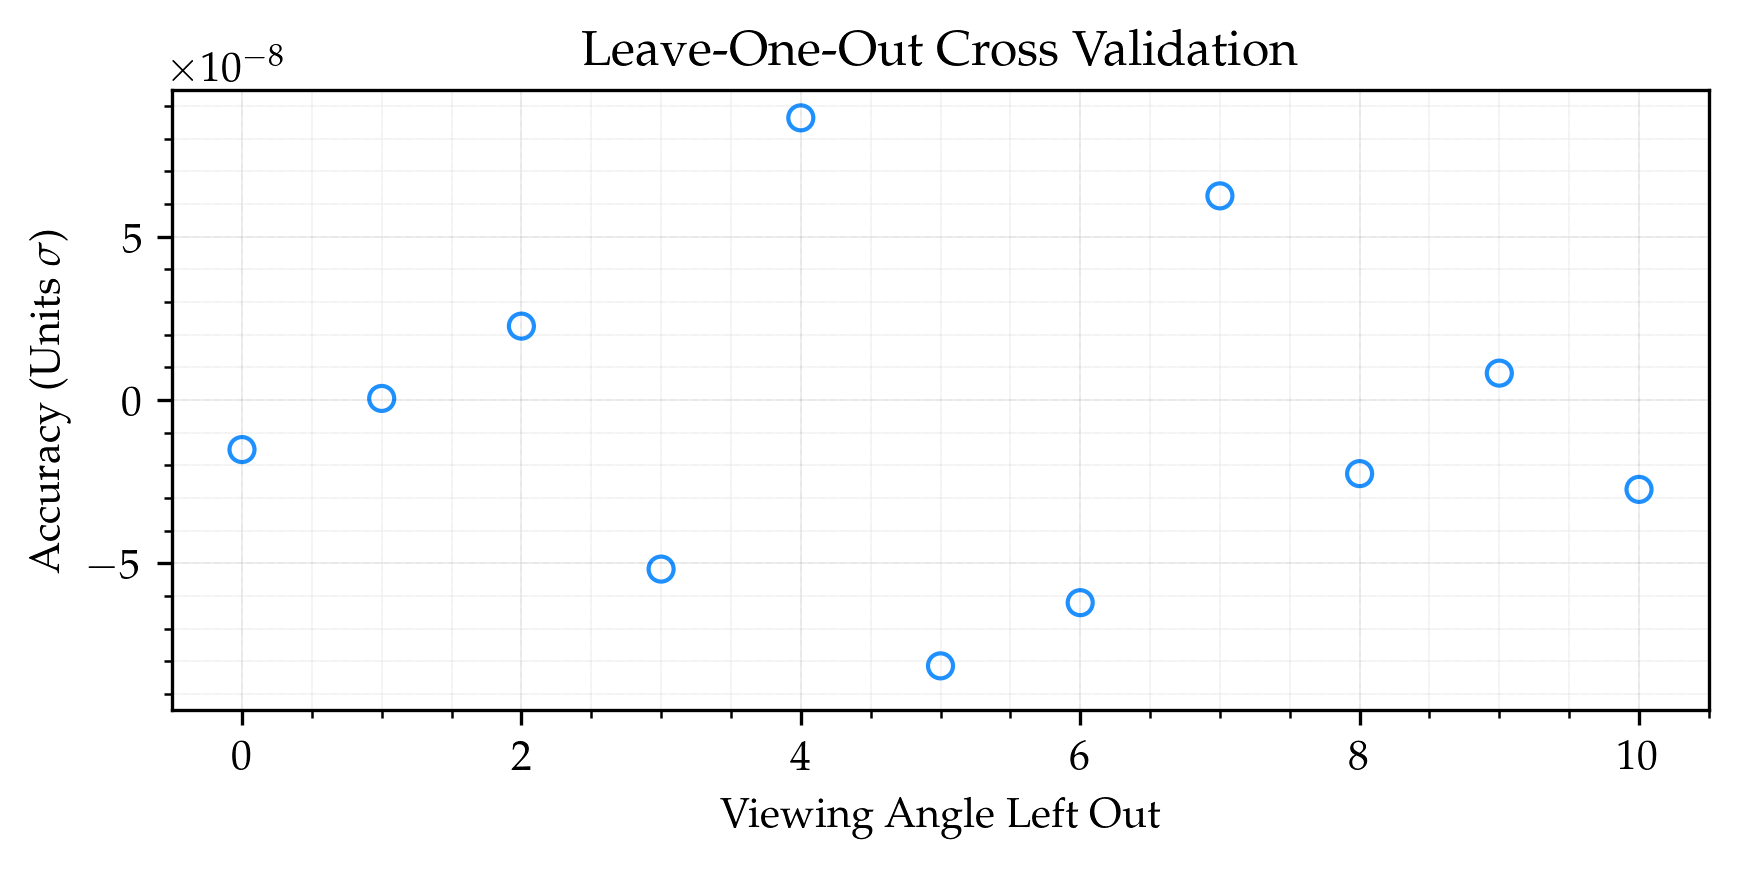

In [16]:
gp0.plot_loocv(plot_type = "multiple")

Inside 5x: 11, Total: 11


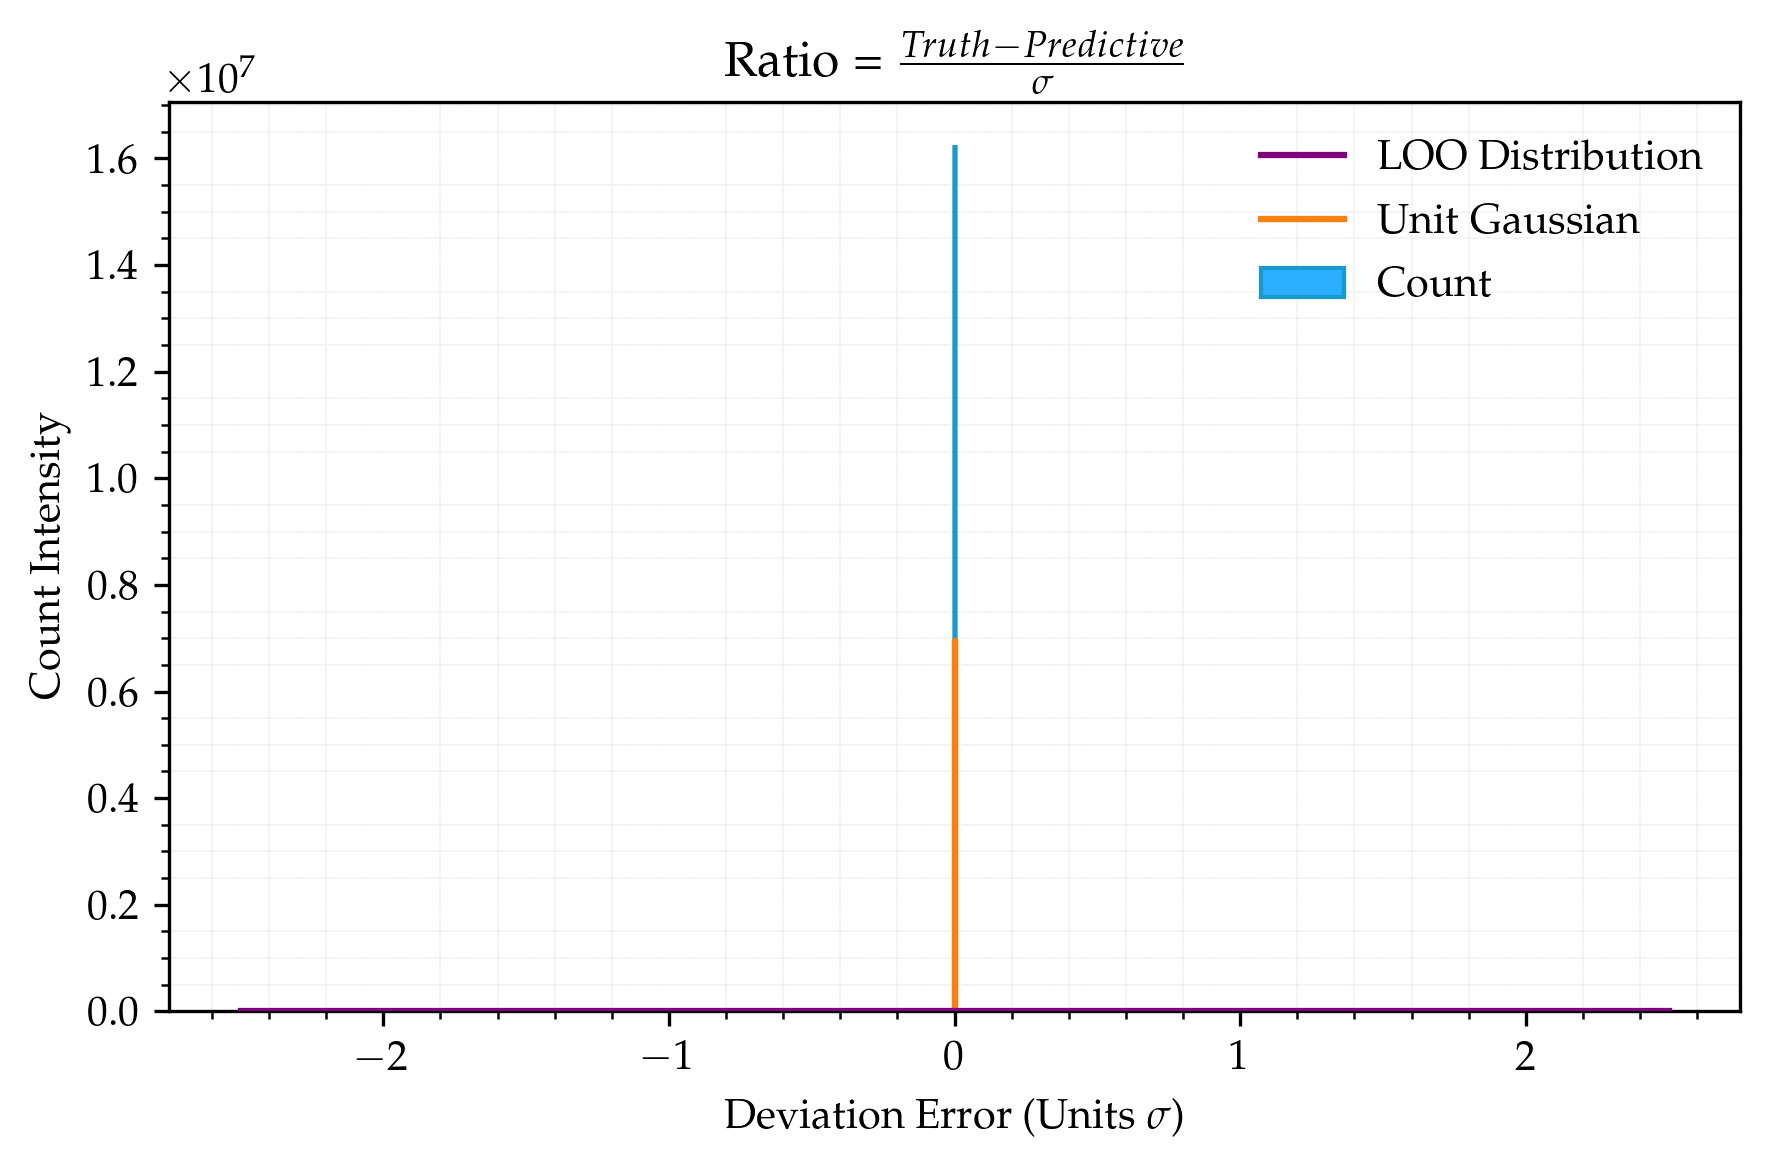

In [17]:
gp0.plot_loocv_histogram()

# Multi-Dimensional Gaussian Process

In [18]:
# gp = GP2D("reference.csv")
# phi_range = [45]
# mejwind_range = []
# mejdyn_range = [0.01]
# wv_range = [900]
# gp.set_selection_range(typ = "mejwind", phi_range = phi_range, 
#                        mejwind_range = mejwind_range, mejdyn_range = mejdyn_range,
#                       wv_range = wv_range, verbose = True)
# gp.log_trainingND()
# gp.normalize_training2D()
# # display(gp.training2D)
# gp.setXY()
# gp.set_kernel(GPy.kern.RBF(input_dim=2, variance = 1, lengthscale=10))
# gp.set_model(GPy.models.GPRegression(gp.X,gp.Y,gp.kernel))
# gp.model_train(verbose = True)
# gp.model_predict(N = 20, make_cov = True, include_like = True)
# gp.unnormalize_training2D()

In [19]:
# gp.plot_covariance2D()

In [20]:
# gp.model.plot() # GPy Plotting
# gp.plot_posterior2D(verbose = True, lev = 20) # My Plotting

# 2D-LOOCV

In [21]:
gp0 = GP2D("reference.csv")
phi_range = [60]
mejwind_range = [0.05]
mejdyn_range = [0.02]
wv_range = [250]
gp0.extraction_time = 0.5
gp0.set_selection_range(typ = "phi", phi_range = phi_range, 
                       mejwind_range = mejwind_range, mejdyn_range = mejdyn_range,
                      wv_range = wv_range, verbose = False)
tempDF = gp0.training2D
# display(gp0.selected)
gp0.set_kernel(GPy.kern.RBF(input_dim=2, variance = 1, lengthscale=1, ARD = True))
gp0.LOOCV_2D(verbose = False)

(True, 0)

# Cross Validation LOO-CV 2D Histogram

In [22]:
# gp = GP2D("reference.csv")
# typ = "mejwind"
# gp.set_kernel(GPy.kern.RBF(input_dim=2, variance = 1, lengthscale=10, ARD = True))
# gp.phi_range = [60]
# gp.mejdyn_range = [0.01]
# gp.mejwind_range = [0.05]
# gp.wv_range = [250]
# gp.extraction_time = 0.5
# gp.multiple_LOOCV_2D(typ, verbose = 4, include_like = True, empirical = True)

In [23]:
# gp.plot_loocv_histogram(binning = 20)
# print(f"Failed {sum(gp.failed)}")
# plt.show()

In [24]:
# # Colour graident to see which points are giving those hyperlength values
# plt.scatter(list(gp.lengthscaleList_multiple1), list(gp.lengthscaleList_multiple2)) 
# # plt.xlim(0,5)
# # plt.ylim(0,5)
# plt.show()

# # print(list(gp.lengthscaleList_multiple1)[i], list(gp.lengthscaleList_multiple2)[i])

In [25]:
# gp.plot_hist_lengthscale(gp.lengthscaleList_multiple1.flatten())
# gp.plot_hist_lengthscale(gp.lengthscaleList_multiple2.flatten())
# plt.show()

# This part is useless (I've ignored all training data since LOOCV2D basically does that)

In [26]:
gpp = GP2D("reference.csv")
gpp.wv_range = [250]
gpp.extraction_time = 0.5
# gpp.generate_all_data()
# gpp.model_train_all(verbose = False)

In [27]:
# gpp.selected = gpp.reference.iloc[[1]]
# gpp.extract_curve()
# curr_info = gpp.selected.iloc[0].tolist()[1:-1] # [mejdyn, mejwind,phi]
# z = gpp.curve.T[gpp.curve.T.index == gpp.wv_range[0]]
# z = z.reset_index(drop = True)
# z = z.apply(pd.Series.explode).reset_index(drop = True)
# z["time"] = gpp.time_arr
# z.index.name = "time_step"
# idx = z["time"].sub(gpp.extraction_time).abs().idxmin()
# z = z.loc[[idx]]
# z.T

# Finish Optimization Pipeline

In [28]:
gp0.model_predict(N = 20, make_cov = False, include_like = True)
gp0.unnormalize_training2D()
print(gp0.model.rbf.lengthscale)

  index  |  GP_regression.rbf.lengthscale  |  constraints  |  priors
  [0]    |                     1.29106961  |      +ve      |        
  [1]    |                     0.54880805  |      +ve      |        


 /Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/GPy/plotting/matplot_dep/plot_definitions.py:184: UserWarning:The following kwargs were not used by contour: 'label', 'linewidth'


{'dataplot': [<matplotlib.collections.PathCollection at 0x7f9f30f65eb0>],
 'gpmean': [<matplotlib.contour.QuadContourSet at 0x7f9f30f654f0>]}

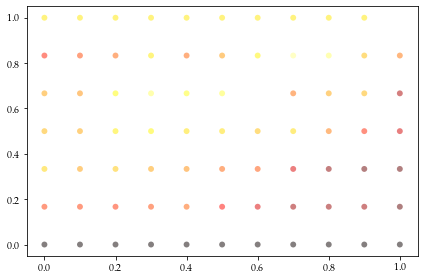

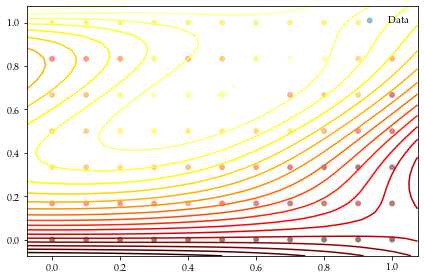

In [29]:
gp0.model.plot_data()
gp0.model.plot()

In [30]:
print(gp0.mejwind_range)
print(gp0.wv_range)
print(gp0.phi_range)
tempDF

[0.05]
250
[45]


iobs,0,1,2,3,4,5,6,7,8,9,10
phi,,,,,,,,,,,
0,0.008634,0.008634,0.008634,0.008634,0.008634,0.008634,0.008634,0.008634,0.008634,0.008634,0.008634
15,0.004310,0.004295,0.004415,0.004172,0.003914,0.004797,0.005330,0.006138,0.006252,0.006111,0.007069
30,0.002994,0.003396,0.003077,0.003373,0.003545,0.003925,0.004064,0.005312,0.006370,0.006926,0.007004
45,0.003205,0.003331,0.002812,0.002741,0.002902,0.002907,0.003154,0.002934,0.003726,0.004515,0.005430
60,0.003377,0.003518,0.002708,0.002343,0.002605,0.002464,0.001818,0.003812,0.003335,0.003215,0.005922
75,0.004585,0.004166,0.003897,0.002832,0.003907,0.003440,0.002768,0.002169,0.002299,0.003160,0.003752
90,0.002836,0.002836,0.002836,0.002836,0.002836,0.002836,0.002836,0.002836,0.002836,0.002836,0.002836


In [31]:
training_data = tempDF.to_numpy(dtype = float).reshape(tempDF.shape)
training_data

array([[0.008634 , 0.008634 , 0.008634 , 0.008634 , 0.008634 , 0.008634 ,
        0.008634 , 0.008634 , 0.008634 , 0.008634 , 0.008634 ],
       [0.0043101, 0.0042947, 0.0044153, 0.0041721, 0.0039136, 0.0047973,
        0.0053304, 0.0061379, 0.0062521, 0.0061114, 0.0070686],
       [0.0029937, 0.003396 , 0.0030765, 0.0033726, 0.0035448, 0.0039247,
        0.0040636, 0.0053116, 0.0063699, 0.0069259, 0.0070037],
       [0.0032054, 0.0033312, 0.0028117, 0.0027414, 0.0029021, 0.0029067,
        0.0031542, 0.002934 , 0.0037263, 0.0045149, 0.0054302],
       [0.0033774, 0.0035178, 0.0027083, 0.0023434, 0.0026047, 0.0024637,
        0.0018176, 0.0038121, 0.003335 , 0.0032148, 0.0059222],
       [0.0045853, 0.004166 , 0.0038974, 0.0028319, 0.0039065, 0.0034402,
        0.0027682, 0.0021692, 0.0022987, 0.0031596, 0.0037518],
       [0.0028358, 0.0028358, 0.0028358, 0.0028358, 0.0028358, 0.0028358,
        0.0028358, 0.0028358, 0.0028358, 0.0028358, 0.0028358]])

In [32]:
gp0.curr_range_list

array([ 0, 15, 30, 45, 60, 75, 90])

[STATUS] Plotting for: 
[STATUS] mejdyn: [0.02] 
[STATUS] mejwind: [0.05] 
[STATUS] phi: [ 0 15 30 45 60 75 90] 
[STATUS] viewing_angle: [ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10.] 
[STATUS] wavelength: 250


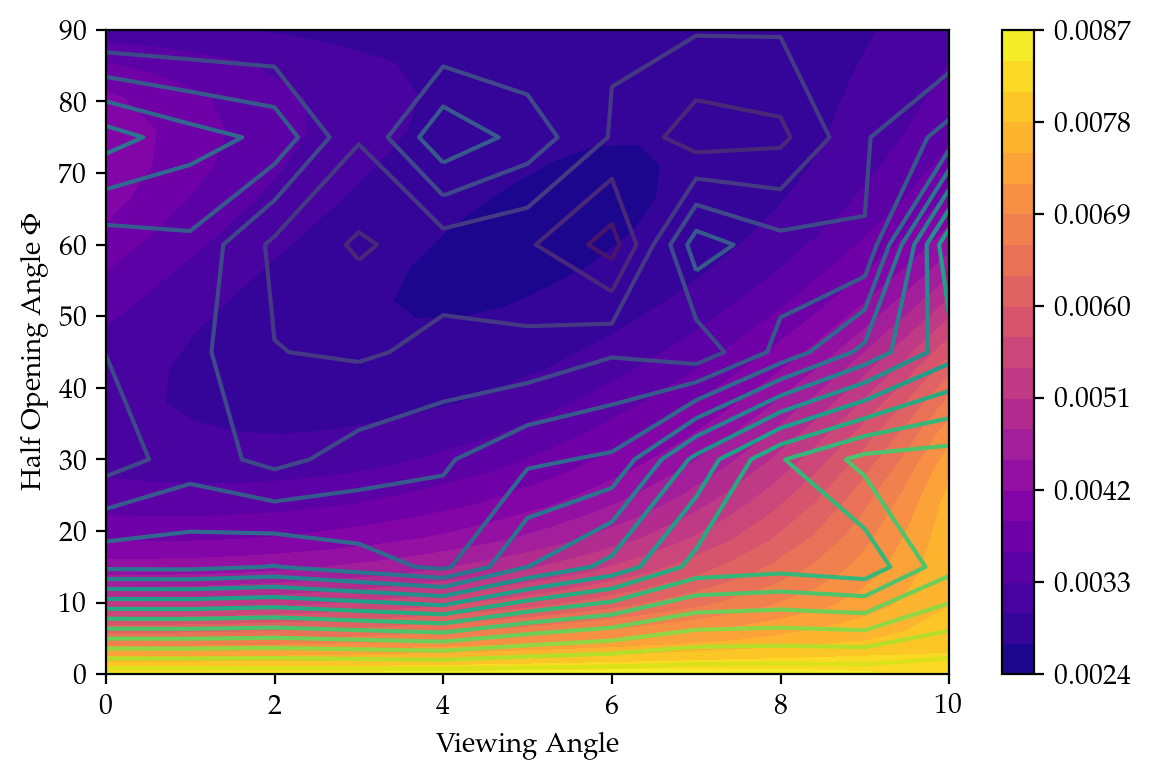

In [33]:
# gp0.model.plot()
gp0.posterior_mean = 10 ** (gp0.posterior_mean)
gp0.predX1 = np.linspace(min(gp0.iobs_range), max(gp0.iobs_range), gp0.N, endpoint = True)
gp0.predX2 = np.linspace(min(gp0.curr_range_list), max(gp0.curr_range_list), gp0.N, endpoint = True)
gp0.plot_posterior2D(verbose = True, lev = 20)
plt.contour(gp0.iobs_range, gp0.curr_range_list, training_data, levels = 20)
plt.show()

In [34]:
mat = gp0.posterior_mean.reshape(gp0.N, gp0.N)
mat.shape

(20, 20)

In [35]:
gp0.Y.shape

(77, 1)

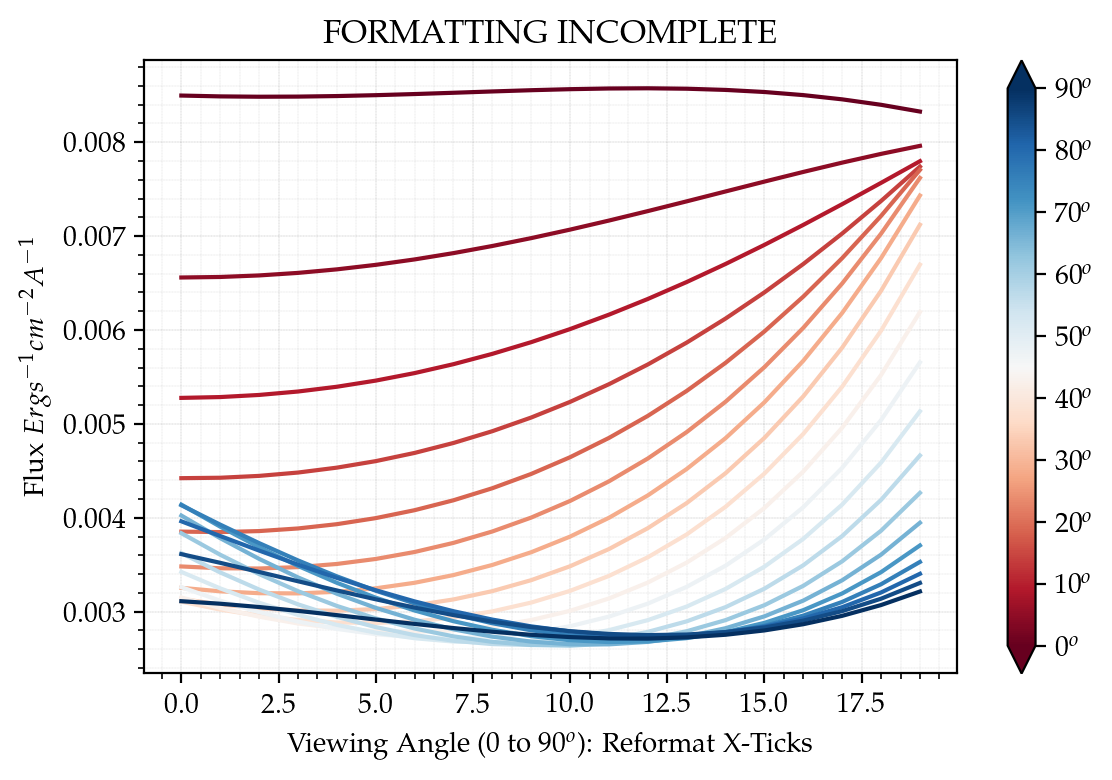

In [36]:
plt.figure(dpi = 200)
colors = plt.cm.RdBu(np.linspace(0,1,len(gp0.predX2)))
my_cmap = "RdBu"
self = gp0
for i in range(len(gp0.predX2)):
    # Goes from left to right, bottom to top
    plt.plot(mat[i], color = colors[i])#, label = f"{gp0.typ} = {gp0.predX2[i]}") 
#     plt.xlabel("Viewing Angle (0 to 11)")
    plt.xlabel(r"Viewing Angle (0 to $90^o$): Reformat X-Ticks")
    plt.ylabel(r"Flux $Erg s^{-1} cm^{-2}A^{-1}$")

sm = plt.cm.ScalarMappable(cmap=my_cmap, norm=plt.Normalize(vmin=min(gp0.predX2), vmax=max(gp0.predX2)))
cbar = plt.colorbar(sm, extend='both', format=mpl.ticker.FuncFormatter(self._fmt_degree))    
utkarshGrid()
plt.title("FORMATTING INCOMPLETE")
plt.show()

# PCA (First Attempt)

In [37]:
# phi_range = [30]
# mejdyn_range = [0.01]
# mejwind_range = [0.11]
# data = LightCurve("reference.csv")
# data.select_viewingangle(phi_range, mejdyn_range, mejwind_range, 900)
# i=5
# time_arr = data.viewingangle[i].to_numpy(dtype = float) #viewing angle = 0, for all time. 
# data.Ntime = np.array(data.Ntime, dtype = int)
# x = np.linspace(data.Ntime[1], data.Ntime[2], data.Ntime[0], endpoint = True)
# plt.plot(x, time_arr)
# plt.show()

In [38]:
# from sklearn.preprocessing import StandardScaler
# from sklearn.decomposition import PCA

# del data.viewingangle['time']
# scaler = StandardScaler()
# scaler.fit(data.viewingangle)
# scaled_data = scaler.transform(data.viewingangle)

# num_pca_components = 2

# pca = PCA(n_components = num_pca_components)
# pca.fit(scaled_data)

In [39]:
# data.viewingangle.T.shape
# scaled_data.shape

In [40]:
# print(pca.components_.shape)
# print(pca.n_samples_)
# print(pca.n_features_)
# pca.components_ = pca.components_
# # pca.components_

In [41]:
# x_pca = pca.transform(scaled_data)
# print(scaled_data.shape)
# print(x_pca.shape)

In [42]:
# len(x_pca[:,0])

In [43]:
# plt.figure()
# plt.scatter(x_pca[:,0], x_pca[:,1], c = data.viewingangle.index)
# plt.xlabel("PC1")
# plt.ylabel("PC2")
# plt.title("Color = Timestep")
# plt.show()

In [44]:
# proj0 = pca.inverse_transform(x_pca)
# proj = scaler.inverse_transform(proj0)
# plt.figure(dpi = 150)
# plt.plot(x, time_arr, label = "Training Data")
# plt.plot(x, proj.T[i], label = "Reversed PCA (Without Components)", linestyle = "dashed")
# plt.legend()
# plt.show()

# PCA (Second Dimensional Attempt)

In [45]:
# for index, row in data.reference.iterrows():
#     phi_range = [row.phi]
#     mejwind_range = [row.mejwind]
#     mejdyn_range = [row.mejdyn]
    
#     data = LightCurve("reference.csv")
#     data.select_viewingangle(phi_range, mejdyn_range, mejwind_range, 900)
#     save_matrix_list = []
    
#     for i in wv_range:
#         data.select_viewingangle(phi_range, mejdyn_range, mejwind_range, i)
#         del data.viewingangle['time']
#         curr_matrix = data.viewingangle.to_numpy(dtype=float).reshape(data.viewingangle.shape)
#         save_matrix_list.append(curr_matrix)

#     save_matrix = np.stack(save_matrix_list, axis = 2)
#     save_matrix.shape
#     np.save(f"pca/mejdyn{mejdyn_range[0]}_mejwind{mejwind_range[0]}_phi{phi_range[0]}", save_matrix)

In [46]:
# phi_range = [90]
# mejwind_range = [0.01]
# mejdyn_range = [0.01]

# data = LightCurve("reference.csv")
# data.select_viewingangle(phi_range, mejdyn_range, mejwind_range, 900)
# save_matrix_list = []
# data.viewingangle

In [47]:
# new_data = np.load("pca/mejdyn0.01_mejwind0.01_phi90.npy")
# new_data.shape

In [48]:
# pca_matrix = np.load("pca/mejdyn0.01_mejwind0.11_phi30.npy")
# wv_range = np.arange(100, 3000, 100)
# time_range = np.linspace(int(gp0.Ntime[1]), int(gp0.Ntime[2]), int(gp0.Ntime[0]), endpoint = True)

In [49]:
# scalers = {}
# pcaDict = {}
# num_pca_components = 3
# scaled_data = np.zeros(pca_matrix.shape, dtype = float)
# x_pca = np.zeros((pca_matrix.shape[2], pca_matrix.shape[0], num_pca_components), dtype = float)
# x_pca_inv = np.zeros(pca_matrix.shape, dtype = float)
# inverted_scaled_data = np.zeros(pca_matrix.shape, dtype = float)
# pcaComponents = np.zeros((pca_matrix.shape[2], num_pca_components, pca_matrix.shape[1]), dtype = float)

# for i in range(pca_matrix.shape[2]):
#     scalers[i] = StandardScaler()
#     scalers[i].fit(pca_matrix[:,:,i])
#     scaled_data[:, :, i] = scalers[i].transform(pca_matrix[:,:,i]) 
#     pcaDict[i] = PCA(n_components = num_pca_components)
#     pcaDict[i].fit(scaled_data[:, :, i])
    

#     pcaComponents[i,:,:] = pcaDict[i].components_
    
#     # GP EMULATOR GOES IN HERE TO REPLACE pcaComponents
#     # pcaComponents[i,:,:] = pcaComponents[i,:,:] * 1.5

# for i in range(pca_matrix.shape[2]):
#     pcaDict[i].components_ = pcaComponents[i,:,:]
#     x_pca[i,:,:] = pcaDict[i].transform(scaled_data[:, :, i])
#     x_pca_inv[:,:,i] = pcaDict[i].inverse_transform(x_pca[i,:,:])
#     inverted_scaled_data[:,:,i] = scalers[i].inverse_transform(x_pca_inv[:,:,i])
    

In [50]:
# x_pca.shape

In [51]:
# pcaDict[0].components_.shape

In [52]:
# pcaComponents.shape

In [53]:
# plt.figure(dpi = 200)

# colMap = np.tile(time_range, pca_matrix.shape[2]) # Time Split
# # colMap = np.tile(wv_range, pca_matrix.shape[0]) # Wavelength split
# plt.scatter(x_pca[:,:,0].flatten(), x_pca[:, : ,1].flatten(),
#             c = colMap, marker = "o", label = "", alpha = 1)

# plt.xlabel("PC1 Dimension")
# plt.ylabel("PC2 Dimension")
# plt.title("PCA: Wavelength-Time Data Reduction")
# cbar = plt.colorbar()
# cbar.set_label("Time (Days)")
# plt.show()

In [54]:
# wv_index = 11
# viewing_angle = 6

# plt.figure(dpi = 150)
# plt.plot(x, pca_matrix[:,viewing_angle,wv_index], label = "Training Data")
# plt.plot(x, inverted_scaled_data[:,viewing_angle,wv_index], label = "Reversed PCA (Without Components)", linestyle = "dashed")
# plt.legend()
# plt.show()

# Convert all of this into a class for PCA and then apply the emulator to the PCA (it'll need to be multi output)

### Train on all curves + pca components once

In [55]:
# pcaComponents.shape

In [56]:
# pcaComponents.flatten()

In [57]:
# display(data.viewingangle)
# pca_matrix[:,:,-1]

In [58]:
for index, row, in data.reference.iterrows():
    pca_matrix = np.load(f"pca/mejdyn{row.mejdyn}_mejwind{row.mejwind}_phi{row.phi}.npy")
    
    if pca_matrix.shape == (100, 1, 29):
        pca_matrix = np.tile(pca_matrix, (1, 11, 1))
    
    wv_range = np.arange(100, 3000, 100)
    time_range = np.linspace(int(gp0.Ntime[1]), int(gp0.Ntime[2]), int(gp0.Ntime[0]), endpoint = True)
    scalers = {}
    pcaDict = {}
    num_pca_components = 3
    scaled_data = np.zeros(pca_matrix.shape, dtype = float)
    x_pca = np.zeros((pca_matrix.shape[2], pca_matrix.shape[0], num_pca_components), dtype = float)
    x_pca_inv = np.zeros(pca_matrix.shape, dtype = float)
    inverted_scaled_data = np.zeros(pca_matrix.shape, dtype = float)
    pcaComponents = np.zeros((pca_matrix.shape[2], num_pca_components, pca_matrix.shape[1]), dtype = float)

    for i in range(pca_matrix.shape[2]):
        scalers[i] = StandardScaler()
        scalers[i].fit(pca_matrix[:,:,i])
        scaled_data[:, :, i] = scalers[i].transform(pca_matrix[:,:,i]) 
        pcaDict[i] = PCA(n_components = num_pca_components)
        pcaDict[i].fit(scaled_data[:, :, i])
        pcaComponents[i,:,:] = pcaDict[i].components_
        
        
#     np.save(f"pcaComponents/mejdyn{row.mejdyn}_mejwind{row.mejwind}_phi{row.phi}.npy", pcaComponents)

 /Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/decomposition/_pca.py:463: RuntimeWarning:invalid value encountered in true_divide
 /Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/decomposition/_pca.py:463: RuntimeWarning:invalid value encountered in true_divide
 /Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/decomposition/_pca.py:463: RuntimeWarning:invalid value encountered in true_divide
 /Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/decomposition/_pca.py:463: RuntimeWarning:invalid value encountered in true_divide
 /Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/decomposition/_pca.py:463: RuntimeWarning:invalid value encountered in true_divide
 /Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/decomposition/_pca.py:463: RuntimeWarning:invalid value encount

 /Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/decomposition/_pca.py:463: RuntimeWarning:invalid value encountered in true_divide
 /Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/decomposition/_pca.py:463: RuntimeWarning:invalid value encountered in true_divide
 /Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/decomposition/_pca.py:463: RuntimeWarning:invalid value encountered in true_divide
 /Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/decomposition/_pca.py:463: RuntimeWarning:invalid value encountered in true_divide
 /Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/decomposition/_pca.py:463: RuntimeWarning:invalid value encountered in true_divide
 /Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/decomposition/_pca.py:463: RuntimeWarning:invalid value encount

 /Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/decomposition/_pca.py:463: RuntimeWarning:invalid value encountered in true_divide
 /Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/decomposition/_pca.py:463: RuntimeWarning:invalid value encountered in true_divide
 /Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/decomposition/_pca.py:463: RuntimeWarning:invalid value encountered in true_divide
 /Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/decomposition/_pca.py:463: RuntimeWarning:invalid value encountered in true_divide
 /Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/decomposition/_pca.py:463: RuntimeWarning:invalid value encountered in true_divide
 /Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/decomposition/_pca.py:463: RuntimeWarning:invalid value encount

 /Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/decomposition/_pca.py:463: RuntimeWarning:invalid value encountered in true_divide
 /Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/decomposition/_pca.py:463: RuntimeWarning:invalid value encountered in true_divide
 /Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/decomposition/_pca.py:463: RuntimeWarning:invalid value encountered in true_divide
 /Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/decomposition/_pca.py:463: RuntimeWarning:invalid value encountered in true_divide
 /Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/decomposition/_pca.py:463: RuntimeWarning:invalid value encountered in true_divide
 /Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/decomposition/_pca.py:463: RuntimeWarning:invalid value encount

In [59]:
scaled_data.shape

(100, 11, 37)

# GP Emulator 5-D

In [60]:
data = GP2D("reference.csv")

In [61]:
x = []
for index, row, in data.reference.iterrows():
    x.append([row.mejdyn, row.mejwind, row.phi])
    
    
X = np.array(x, dtype = float)

In [62]:
yList = []
for i in range(len(X)):
    mejdyn, mejwind, phi = X[i]
    phi = int(phi)
    y = np.load(f"pcaComponents/mejdyn{mejdyn}_mejwind{mejwind}_phi{phi}.npy")

    y.shape
    tempY = y.flatten()
    assert np.allclose(y, tempY.reshape(y.shape))
    yList.append(tempY)
    
Y = np.array(yList, dtype = float)
Y.shape

(196, 2035)

In [63]:
kernel = GPy.kern.RBF(input_dim=3, variance = 1, lengthscale=1, ARD = True)
model = GPy.models.GPRegression(X,Y,kernel)
model['.*lengthscale'].constrain_bounded(0,5)
model.optimize(messages = True)

reconstraining parameters GP_regression.rbf.lengthscale


In [64]:
print(x_pca.shape, scaled_data.shape)
print(pca_matrix.shape, y.shape)

(37, 100, 3) (100, 11, 37)
(100, 11, 37) (37, 5, 11)


In [65]:
print(model.rbf.lengthscale)
pred_arr, pred_var = model.predict(X)
trained_pcaComponents = pred_arr[-1].reshape(y.shape)
inverted_trained_data = np.zeros(pca_matrix.shape, dtype = float)

for i in range(pca_matrix.shape[2]):
    pcaDict[i].components_ = trained_pcaComponents[i,:,:]
    x_pca[i,:,:] = pcaDict[i].transform(scaled_data[:, :, i])
    x_pca_inv[:,:,i] = pcaDict[i].inverse_transform(x_pca[i,:,:])
    inverted_trained_data[:,:,i] = scalers[i].inverse_transform(x_pca_inv[:,:,i])

print(Y.shape, pred_arr.shape)
print(inverted_trained_data.shape)

  index  |  GP_regression.rbf.lengthscale  |  constraints  |  priors
  [0]    |                     0.99227538  |    0.0,5.0    |        
  [1]    |                     2.26193239  |    0.0,5.0    |        
  [2]    |                     1.00000000  |    0.0,5.0    |        


ValueError: could not broadcast input array from shape (100,5) into shape (100,3)

In [ ]:
trained_pcaComponents.shape

In [ ]:
wv_index = 10
viewing_angle = 8
t = np.linspace(0, 20, 100, endpoint = True)

plt.figure(dpi = 150)
plt.plot(t, pca_matrix[:,viewing_angle,wv_index], label = "Training Data")
plt.plot(t, inverted_trained_data[:,viewing_angle,wv_index], label = "Trained Emulator + PCA", linestyle = "dashed")
plt.legend()
plt.show()

In [5]:
# import os
# import numpy as np

# for subdir, dirs, files in os.walk(r'/Users/utkarsh/PycharmProjects/SURP2021/Gaussian Process V1.19/pcaFULL'):
#     for filename in files:
#         filepath = subdir + os.sep + filename

#         if filepath.endswith(".npy"):
#             print (filepath)
#             log_e = np.load(filepath)
#             base_converted = log_e/np.log(10)
#             np.save(filepath, base_converted)

/Users/utkarsh/PycharmProjects/SURP2021/Gaussian Process V1.19/pcaFULL/mejdyn0.005_mejwind0.09_phi15_iobs3.npy
/Users/utkarsh/PycharmProjects/SURP2021/Gaussian Process V1.19/pcaFULL/mejdyn0.02_mejwind0.11_phi60_iobs4.npy
/Users/utkarsh/PycharmProjects/SURP2021/Gaussian Process V1.19/pcaFULL/mejdyn0.001_mejwind0.13_phi90_iobs5.npy
/Users/utkarsh/PycharmProjects/SURP2021/Gaussian Process V1.19/pcaFULL/mejdyn0.02_mejwind0.01_phi90_iobs7.npy
/Users/utkarsh/PycharmProjects/SURP2021/Gaussian Process V1.19/pcaFULL/mejdyn0.02_mejwind0.09_phi15_iobs8.npy
/Users/utkarsh/PycharmProjects/SURP2021/Gaussian Process V1.19/pcaFULL/mejdyn0.001_mejwind0.03_phi60_iobs6.npy
/Users/utkarsh/PycharmProjects/SURP2021/Gaussian Process V1.19/pcaFULL/mejdyn0.01_mejwind0.01_phi75_iobs9.npy
/Users/utkarsh/PycharmProjects/SURP2021/Gaussian Process V1.19/pcaFULL/mejdyn0.005_mejwind0.07_phi30_iobs9.npy
/Users/utkarsh/PycharmProjects/SURP2021/Gaussian Process V1.19/pcaFULL/mejdyn0.02_mejwind0.07_phi30_iobs2.npy
/Users

/Users/utkarsh/PycharmProjects/SURP2021/Gaussian Process V1.19/pcaFULL/mejdyn0.02_mejwind0.01_phi90_iobs4.npy
/Users/utkarsh/PycharmProjects/SURP2021/Gaussian Process V1.19/pcaFULL/mejdyn0.001_mejwind0.13_phi90_iobs6.npy
/Users/utkarsh/PycharmProjects/SURP2021/Gaussian Process V1.19/pcaFULL/mejdyn0.005_mejwind0.09_phi15_iobs0.npy
/Users/utkarsh/PycharmProjects/SURP2021/Gaussian Process V1.19/pcaFULL/mejdyn0.02_mejwind0.11_phi60_iobs7.npy
/Users/utkarsh/PycharmProjects/SURP2021/Gaussian Process V1.19/pcaFULL/mejdyn0.01_mejwind0.03_phi15_iobs9.npy
/Users/utkarsh/PycharmProjects/SURP2021/Gaussian Process V1.19/pcaFULL/mejdyn0.02_mejwind0.07_phi30_iobs1.npy
/Users/utkarsh/PycharmProjects/SURP2021/Gaussian Process V1.19/pcaFULL/mejdyn0.001_mejwind0.01_phi0_iobs4.npy
/Users/utkarsh/PycharmProjects/SURP2021/Gaussian Process V1.19/pcaFULL/mejdyn0.005_mejwind0.01_phi45_iobs3.npy
/Users/utkarsh/PycharmProjects/SURP2021/Gaussian Process V1.19/pcaFULL/mejdyn0.02_mejwind0.11_phi0_iobs1.npy
/Users/u

/Users/utkarsh/PycharmProjects/SURP2021/Gaussian Process V1.19/pcaFULL/mejdyn0.005_mejwind0.05_phi0_iobs9.npy
/Users/utkarsh/PycharmProjects/SURP2021/Gaussian Process V1.19/pcaFULL/mejdyn0.02_mejwind0.01_phi90_iobs1.npy
/Users/utkarsh/PycharmProjects/SURP2021/Gaussian Process V1.19/pcaFULL/mejdyn0.005_mejwind0.11_phi60_iobs9.npy
/Users/utkarsh/PycharmProjects/SURP2021/Gaussian Process V1.19/pcaFULL/mejdyn0.001_mejwind0.03_phi60_iobs0.npy
/Users/utkarsh/PycharmProjects/SURP2021/Gaussian Process V1.19/pcaFULL/mejdyn0.005_mejwind0.09_phi15_iobs5.npy
/Users/utkarsh/PycharmProjects/SURP2021/Gaussian Process V1.19/pcaFULL/mejdyn0.02_mejwind0.11_phi60_iobs2.npy
/Users/utkarsh/PycharmProjects/SURP2021/Gaussian Process V1.19/pcaFULL/mejdyn0.001_mejwind0.13_phi90_iobs3.npy
/Users/utkarsh/PycharmProjects/SURP2021/Gaussian Process V1.19/pcaFULL/mejdyn0.01_mejwind0.05_phi60_iobs5.npy
/Users/utkarsh/PycharmProjects/SURP2021/Gaussian Process V1.19/pcaFULL/mejdyn0.001_mejwind0.05_phi15_iobs9.npy
/User

/Users/utkarsh/PycharmProjects/SURP2021/Gaussian Process V1.19/pcaFULL/mejdyn0.005_mejwind0.01_phi75_iobs9.npy
/Users/utkarsh/PycharmProjects/SURP2021/Gaussian Process V1.19/pcaFULL/mejdyn0.01_mejwind0.09_phi15_iobs3.npy
/Users/utkarsh/PycharmProjects/SURP2021/Gaussian Process V1.19/pcaFULL/mejdyn0.001_mejwind0.11_phi15_iobs3.npy
/Users/utkarsh/PycharmProjects/SURP2021/Gaussian Process V1.19/pcaFULL/mejdyn0.02_mejwind0.01_phi75_iobs2.npy
/Users/utkarsh/PycharmProjects/SURP2021/Gaussian Process V1.19/pcaFULL/mejdyn0.001_mejwind0.07_phi45_iobs5.npy
/Users/utkarsh/PycharmProjects/SURP2021/Gaussian Process V1.19/pcaFULL/mejdyn0.01_mejwind0.07_phi30_iobs9.npy
/Users/utkarsh/PycharmProjects/SURP2021/Gaussian Process V1.19/pcaFULL/mejdyn0.02_mejwind0.03_phi0_iobs6.npy
/Users/utkarsh/PycharmProjects/SURP2021/Gaussian Process V1.19/pcaFULL/mejdyn0.001_mejwind0.13_phi0_iobs3.npy
/Users/utkarsh/PycharmProjects/SURP2021/Gaussian Process V1.19/pcaFULL/mejdyn0.01_mejwind0.13_phi30_iobs2.npy
/Users/u

/Users/utkarsh/PycharmProjects/SURP2021/Gaussian Process V1.19/pcaFULL/mejdyn0.005_mejwind0.03_phi15_iobs9.npy
/Users/utkarsh/PycharmProjects/SURP2021/Gaussian Process V1.19/pcaFULL/mejdyn0.02_mejwind0.03_phi15_iobs2.npy
/Users/utkarsh/PycharmProjects/SURP2021/Gaussian Process V1.19/pcaFULL/mejdyn0.001_mejwind0.13_phi75_iobs3.npy
/Users/utkarsh/PycharmProjects/SURP2021/Gaussian Process V1.19/pcaFULL/mejdyn0.001_mejwind0.13_phi0_iobs0.npy
/Users/utkarsh/PycharmProjects/SURP2021/Gaussian Process V1.19/pcaFULL/mejdyn0.01_mejwind0.03_phi15_iobs10.npy
/Users/utkarsh/PycharmProjects/SURP2021/Gaussian Process V1.19/pcaFULL/mejdyn0.01_mejwind0.01_phi90_iobs10.npy
/Users/utkarsh/PycharmProjects/SURP2021/Gaussian Process V1.19/pcaFULL/mejdyn0.02_mejwind0.03_phi0_iobs5.npy
/Users/utkarsh/PycharmProjects/SURP2021/Gaussian Process V1.19/pcaFULL/mejdyn0.001_mejwind0.07_phi45_iobs6.npy
/Users/utkarsh/PycharmProjects/SURP2021/Gaussian Process V1.19/pcaFULL/mejdyn0.001_mejwind0.01_phi0_iobs3.npy
/Users

/Users/utkarsh/PycharmProjects/SURP2021/Gaussian Process V1.19/pcaFULL/mejdyn0.001_mejwind0.11_phi30_iobs10.npy
/Users/utkarsh/PycharmProjects/SURP2021/Gaussian Process V1.19/pcaFULL/mejdyn0.01_mejwind0.05_phi75_iobs2.npy
/Users/utkarsh/PycharmProjects/SURP2021/Gaussian Process V1.19/pcaFULL/mejdyn0.02_mejwind0.07_phi0_iobs2.npy
/Users/utkarsh/PycharmProjects/SURP2021/Gaussian Process V1.19/pcaFULL/mejdyn0.005_mejwind0.03_phi30_iobs2.npy
/Users/utkarsh/PycharmProjects/SURP2021/Gaussian Process V1.19/pcaFULL/mejdyn0.02_mejwind0.03_phi30_iobs9.npy
/Users/utkarsh/PycharmProjects/SURP2021/Gaussian Process V1.19/pcaFULL/mejdyn0.01_mejwind0.11_phi45_iobs7.npy
/Users/utkarsh/PycharmProjects/SURP2021/Gaussian Process V1.19/pcaFULL/mejdyn0.001_mejwind0.09_phi45_iobs7.npy
/Users/utkarsh/PycharmProjects/SURP2021/Gaussian Process V1.19/pcaFULL/mejdyn0.001_mejwind0.05_phi0_iobs4.npy
/Users/utkarsh/PycharmProjects/SURP2021/Gaussian Process V1.19/pcaFULL/mejdyn0.001_mejwind0.05_phi30_iobs0.npy
/Users

/Users/utkarsh/PycharmProjects/SURP2021/Gaussian Process V1.19/pcaFULL/mejdyn0.01_mejwind0.09_phi30_iobs8.npy
/Users/utkarsh/PycharmProjects/SURP2021/Gaussian Process V1.19/pcaFULL/mejdyn0.005_mejwind0.03_phi30_iobs1.npy
/Users/utkarsh/PycharmProjects/SURP2021/Gaussian Process V1.19/pcaFULL/mejdyn0.001_mejwind0.05_phi30_iobs3.npy
/Users/utkarsh/PycharmProjects/SURP2021/Gaussian Process V1.19/pcaFULL/mejdyn0.001_mejwind0.05_phi0_iobs7.npy
/Users/utkarsh/PycharmProjects/SURP2021/Gaussian Process V1.19/pcaFULL/mejdyn0.02_mejwind0.05_phi30_iobs10.npy
/Users/utkarsh/PycharmProjects/SURP2021/Gaussian Process V1.19/pcaFULL/mejdyn0.001_mejwind0.03_phi90_iobs6.npy
/Users/utkarsh/PycharmProjects/SURP2021/Gaussian Process V1.19/pcaFULL/mejdyn0.02_mejwind0.01_phi60_iobs7.npy
/Users/utkarsh/PycharmProjects/SURP2021/Gaussian Process V1.19/pcaFULL/mejdyn0.01_mejwind0.13_phi15_iobs9.npy
/Users/utkarsh/PycharmProjects/SURP2021/Gaussian Process V1.19/pcaFULL/mejdyn0.001_mejwind0.13_phi60_iobs5.npy
/User

/Users/utkarsh/PycharmProjects/SURP2021/Gaussian Process V1.19/pcaFULL/mejdyn0.02_mejwind0.07_phi90_iobs2.npy
/Users/utkarsh/PycharmProjects/SURP2021/Gaussian Process V1.19/pcaFULL/mejdyn0.001_mejwind0.05_phi60_iobs3.npy
/Users/utkarsh/PycharmProjects/SURP2021/Gaussian Process V1.19/pcaFULL/mejdyn0.005_mejwind0.07_phi90_iobs9.npy
/Users/utkarsh/PycharmProjects/SURP2021/Gaussian Process V1.19/pcaFULL/mejdyn0.001_mejwind0.03_phi75_iobs1.npy
/Users/utkarsh/PycharmProjects/SURP2021/Gaussian Process V1.19/pcaFULL/mejdyn0.02_mejwind0.13_phi15_iobs0.npy
/Users/utkarsh/PycharmProjects/SURP2021/Gaussian Process V1.19/pcaFULL/mejdyn0.005_mejwind0.11_phi75_iobs8.npy
/Users/utkarsh/PycharmProjects/SURP2021/Gaussian Process V1.19/pcaFULL/mejdyn0.02_mejwind0.11_phi75_iobs3.npy
/Users/utkarsh/PycharmProjects/SURP2021/Gaussian Process V1.19/pcaFULL/mejdyn0.001_mejwind0.01_phi15_iobs2.npy
/Users/utkarsh/PycharmProjects/SURP2021/Gaussian Process V1.19/pcaFULL/mejdyn0.005_mejwind0.13_phi0_iobs9.npy
/User

/Users/utkarsh/PycharmProjects/SURP2021/Gaussian Process V1.19/pcaFULL/mejdyn0.001_mejwind0.03_phi0_iobs6.npy
/Users/utkarsh/PycharmProjects/SURP2021/Gaussian Process V1.19/pcaFULL/mejdyn0.02_mejwind0.13_phi0_iobs3.npy
/Users/utkarsh/PycharmProjects/SURP2021/Gaussian Process V1.19/pcaFULL/mejdyn0.02_mejwind0.13_phi75_iobs8.npy
/Users/utkarsh/PycharmProjects/SURP2021/Gaussian Process V1.19/pcaFULL/mejdyn0.001_mejwind0.11_phi60_iobs10.npy
/Users/utkarsh/PycharmProjects/SURP2021/Gaussian Process V1.19/pcaFULL/mejdyn0.001_mejwind0.03_phi15_iobs9.npy
/Users/utkarsh/PycharmProjects/SURP2021/Gaussian Process V1.19/pcaFULL/mejdyn0.01_mejwind0.13_phi90_iobs6.npy
/Users/utkarsh/PycharmProjects/SURP2021/Gaussian Process V1.19/pcaFULL/mejdyn0.02_mejwind0.09_phi60_iobs7.npy
/Users/utkarsh/PycharmProjects/SURP2021/Gaussian Process V1.19/pcaFULL/mejdyn0.005_mejwind0.11_phi15_iobs0.npy
/Users/utkarsh/PycharmProjects/SURP2021/Gaussian Process V1.19/pcaFULL/mejdyn0.02_mejwind0.09_phi0_iobs1.npy
/Users/u

/Users/utkarsh/PycharmProjects/SURP2021/Gaussian Process V1.19/pcaFULL/mejdyn0.01_mejwind0.13_phi75_iobs9.npy
/Users/utkarsh/PycharmProjects/SURP2021/Gaussian Process V1.19/pcaFULL/mejdyn0.005_mejwind0.07_phi0_iobs3.npy
/Users/utkarsh/PycharmProjects/SURP2021/Gaussian Process V1.19/pcaFULL/mejdyn0.01_mejwind0.09_phi60_iobs6.npy
/Users/utkarsh/PycharmProjects/SURP2021/Gaussian Process V1.19/pcaFULL/mejdyn0.02_mejwind0.13_phi90_iobs7.npy
/Users/utkarsh/PycharmProjects/SURP2021/Gaussian Process V1.19/pcaFULL/mejdyn0.001_mejwind0.01_phi90_iobs5.npy
/Users/utkarsh/PycharmProjects/SURP2021/Gaussian Process V1.19/pcaFULL/mejdyn0.02_mejwind0.03_phi60_iobs4.npy
/Users/utkarsh/PycharmProjects/SURP2021/Gaussian Process V1.19/pcaFULL/mejdyn0.001_mejwind0.01_phi90_iobs4.npy
/Users/utkarsh/PycharmProjects/SURP2021/Gaussian Process V1.19/pcaFULL/mejdyn0.02_mejwind0.03_phi60_iobs5.npy
/Users/utkarsh/PycharmProjects/SURP2021/Gaussian Process V1.19/pcaFULL/mejdyn0.005_mejwind0.07_phi0_iobs2.npy
/Users/u

/Users/utkarsh/PycharmProjects/SURP2021/Gaussian Process V1.19/pcaFULL/mejdyn0.005_mejwind0.07_phi75_iobs6.npy
/Users/utkarsh/PycharmProjects/SURP2021/Gaussian Process V1.19/pcaFULL/mejdyn0.01_mejwind0.01_phi30_iobs6.npy
/Users/utkarsh/PycharmProjects/SURP2021/Gaussian Process V1.19/pcaFULL/mejdyn0.02_mejwind0.03_phi90_iobs10.npy
/Users/utkarsh/PycharmProjects/SURP2021/Gaussian Process V1.19/pcaFULL/mejdyn0.02_mejwind0.01_phi15_iobs10.npy
/Users/utkarsh/PycharmProjects/SURP2021/Gaussian Process V1.19/pcaFULL/mejdyn0.02_mejwind0.13_phi45_iobs8.npy
/Users/utkarsh/PycharmProjects/SURP2021/Gaussian Process V1.19/pcaFULL/mejdyn0.005_mejwind0.13_phi45_iobs3.npy
/Users/utkarsh/PycharmProjects/SURP2021/Gaussian Process V1.19/pcaFULL/mejdyn0.001_mejwind0.07_phi30_iobs3.npy
/Users/utkarsh/PycharmProjects/SURP2021/Gaussian Process V1.19/pcaFULL/mejdyn0.01_mejwind0.01_phi45_iobs10.npy
/Users/utkarsh/PycharmProjects/SURP2021/Gaussian Process V1.19/pcaFULL/mejdyn0.02_mejwind0.03_phi60_iobs7.npy
/Use

/Users/utkarsh/PycharmProjects/SURP2021/Gaussian Process V1.19/pcaFULL/mejdyn0.01_mejwind0.05_phi15_iobs7.npy
/Users/utkarsh/PycharmProjects/SURP2021/Gaussian Process V1.19/pcaFULL/mejdyn0.005_mejwind0.09_phi75_iobs10.npy
/Users/utkarsh/PycharmProjects/SURP2021/Gaussian Process V1.19/pcaFULL/mejdyn0.005_mejwind0.13_phi75_iobs8.npy
/Users/utkarsh/PycharmProjects/SURP2021/Gaussian Process V1.19/pcaFULL/mejdyn0.001_mejwind0.07_phi90_iobs10.npy
/Users/utkarsh/PycharmProjects/SURP2021/Gaussian Process V1.19/pcaFULL/mejdyn0.001_mejwind0.01_phi75_iobs1.npy
/Users/utkarsh/PycharmProjects/SURP2021/Gaussian Process V1.19/pcaFULL/mejdyn0.02_mejwind0.11_phi15_iobs0.npy
/Users/utkarsh/PycharmProjects/SURP2021/Gaussian Process V1.19/pcaFULL/mejdyn0.001_mejwind0.05_phi15_iobs10.npy
/Users/utkarsh/PycharmProjects/SURP2021/Gaussian Process V1.19/pcaFULL/mejdyn0.005_mejwind0.09_phi60_iobs7.npy
/Users/utkarsh/PycharmProjects/SURP2021/Gaussian Process V1.19/pcaFULL/mejdyn0.02_mejwind0.13_phi75_iobs3.npy
/

/Users/utkarsh/PycharmProjects/SURP2021/Gaussian Process V1.19/pcaFULL/mejdyn0.005_mejwind0.11_phi75_iobs3.npy
/Users/utkarsh/PycharmProjects/SURP2021/Gaussian Process V1.19/pcaFULL/mejdyn0.005_mejwind0.05_phi45_iobs6.npy
/Users/utkarsh/PycharmProjects/SURP2021/Gaussian Process V1.19/pcaFULL/mejdyn0.005_mejwind0.13_phi0_iobs2.npy
/Users/utkarsh/PycharmProjects/SURP2021/Gaussian Process V1.19/pcaFULL/mejdyn0.005_mejwind0.01_phi30_iobs7.npy
/Users/utkarsh/PycharmProjects/SURP2021/Gaussian Process V1.19/pcaFULL/mejdyn0.01_mejwind0.13_phi45_iobs2.npy
/Users/utkarsh/PycharmProjects/SURP2021/Gaussian Process V1.19/pcaFULL/mejdyn0.005_mejwind0.07_phi90_iobs2.npy
/Users/utkarsh/PycharmProjects/SURP2021/Gaussian Process V1.19/pcaFULL/mejdyn0.01_mejwind0.05_phi15_iobs4.npy
/Users/utkarsh/PycharmProjects/SURP2021/Gaussian Process V1.19/pcaFULL/mejdyn0.02_mejwind0.07_phi90_iobs9.npy
/Users/utkarsh/PycharmProjects/SURP2021/Gaussian Process V1.19/pcaFULL/mejdyn0.001_mejwind0.05_phi60_iobs8.npy
/User

/Users/utkarsh/PycharmProjects/SURP2021/Gaussian Process V1.19/pcaFULL/mejdyn0.005_mejwind0.01_phi45_iobs9.npy
/Users/utkarsh/PycharmProjects/SURP2021/Gaussian Process V1.19/pcaFULL/mejdyn0.01_mejwind0.07_phi0_iobs4.npy
/Users/utkarsh/PycharmProjects/SURP2021/Gaussian Process V1.19/pcaFULL/mejdyn0.02_mejwind0.01_phi45_iobs2.npy
/Users/utkarsh/PycharmProjects/SURP2021/Gaussian Process V1.19/pcaFULL/mejdyn0.02_mejwind0.03_phi0_iobs8.npy
/Users/utkarsh/PycharmProjects/SURP2021/Gaussian Process V1.19/pcaFULL/mejdyn0.01_mejwind0.07_phi30_iobs7.npy
/Users/utkarsh/PycharmProjects/SURP2021/Gaussian Process V1.19/pcaFULL/mejdyn0.01_mejwind0.07_phi60_iobs10.npy
/Users/utkarsh/PycharmProjects/SURP2021/Gaussian Process V1.19/pcaFULL/mejdyn0.01_mejwind0.11_phi0_iobs10.npy
/Users/utkarsh/PycharmProjects/SURP2021/Gaussian Process V1.19/pcaFULL/mejdyn0.001_mejwind0.09_phi0_iobs10.npy
/Users/utkarsh/PycharmProjects/SURP2021/Gaussian Process V1.19/pcaFULL/mejdyn0.01_mejwind0.01_phi90_iobs2.npy
/Users/ut

/Users/utkarsh/PycharmProjects/SURP2021/Gaussian Process V1.19/pcaFULL/mejdyn0.02_mejwind0.07_phi30_iobs8.npy
/Users/utkarsh/PycharmProjects/SURP2021/Gaussian Process V1.19/pcaFULL/mejdyn0.01_mejwind0.03_phi15_iobs0.npy
/Users/utkarsh/PycharmProjects/SURP2021/Gaussian Process V1.19/pcaFULL/mejdyn0.005_mejwind0.01_phi90_iobs6.npy
/Users/utkarsh/PycharmProjects/SURP2021/Gaussian Process V1.19/pcaFULL/mejdyn0.005_mejwind0.09_phi15_iobs9.npy
/Users/utkarsh/PycharmProjects/SURP2021/Gaussian Process V1.19/pcaFULL/mejdyn0.001_mejwind0.13_phi30_iobs10.npy
/Users/utkarsh/PycharmProjects/SURP2021/Gaussian Process V1.19/pcaFULL/mejdyn0.02_mejwind0.09_phi15_iobs2.npy
/Users/utkarsh/PycharmProjects/SURP2021/Gaussian Process V1.19/pcaFULL/mejdyn0.005_mejwind0.11_phi60_iobs5.npy
/Users/utkarsh/PycharmProjects/SURP2021/Gaussian Process V1.19/pcaFULL/mejdyn0.01_mejwind0.01_phi75_iobs3.npy
/Users/utkarsh/PycharmProjects/SURP2021/Gaussian Process V1.19/pcaFULL/mejdyn0.001_mejwind0.05_phi15_iobs5.npy
/Use

/Users/utkarsh/PycharmProjects/SURP2021/Gaussian Process V1.19/pcaFULL/mejdyn0.01_mejwind0.05_phi60_iobs8.npy
/Users/utkarsh/PycharmProjects/SURP2021/Gaussian Process V1.19/pcaFULL/mejdyn0.001_mejwind0.05_phi15_iobs4.npy
/Users/utkarsh/PycharmProjects/SURP2021/Gaussian Process V1.19/pcaFULL/mejdyn0.005_mejwind0.11_phi60_iobs4.npy
/Users/utkarsh/PycharmProjects/SURP2021/Gaussian Process V1.19/pcaFULL/mejdyn0.02_mejwind0.09_phi15_iobs3.npy
/Users/utkarsh/PycharmProjects/SURP2021/Gaussian Process V1.19/pcaFULL/mejdyn0.01_mejwind0.01_phi75_iobs2.npy
/Users/utkarsh/PycharmProjects/SURP2021/Gaussian Process V1.19/pcaFULL/mejdyn0.005_mejwind0.09_phi15_iobs8.npy
/Users/utkarsh/PycharmProjects/SURP2021/Gaussian Process V1.19/pcaFULL/mejdyn0.005_mejwind0.01_phi90_iobs7.npy
/Users/utkarsh/PycharmProjects/SURP2021/Gaussian Process V1.19/pcaFULL/mejdyn0.01_mejwind0.03_phi15_iobs1.npy
/Users/utkarsh/PycharmProjects/SURP2021/Gaussian Process V1.19/pcaFULL/mejdyn0.02_mejwind0.07_phi30_iobs9.npy
/Users

/Users/utkarsh/PycharmProjects/SURP2021/Gaussian Process V1.19/pcaFULL/mejdyn0.01_mejwind0.01_phi90_iobs5.npy
/Users/utkarsh/PycharmProjects/SURP2021/Gaussian Process V1.19/pcaFULL/mejdyn0.001_mejwind0.09_phi60_iobs6.npy
/Users/utkarsh/PycharmProjects/SURP2021/Gaussian Process V1.19/pcaFULL/mejdyn0.005_mejwind0.01_phi75_iobs0.npy
/Users/utkarsh/PycharmProjects/SURP2021/Gaussian Process V1.19/pcaFULL/mejdyn0.001_mejwind0.13_phi75_iobs9.npy
/Users/utkarsh/PycharmProjects/SURP2021/Gaussian Process V1.19/pcaFULL/mejdyn0.01_mejwind0.11_phi60_iobs6.npy
/Users/utkarsh/PycharmProjects/SURP2021/Gaussian Process V1.19/pcaFULL/mejdyn0.02_mejwind0.03_phi15_iobs8.npy
/Users/utkarsh/PycharmProjects/SURP2021/Gaussian Process V1.19/pcaFULL/mejdyn0.001_mejwind0.07_phi75_iobs2.npy
/Users/utkarsh/PycharmProjects/SURP2021/Gaussian Process V1.19/pcaFULL/mejdyn0.001_mejwind0.05_phi15_iobs1.npy
/Users/utkarsh/PycharmProjects/SURP2021/Gaussian Process V1.19/pcaFULL/mejdyn0.001_mejwind0.13_phi45_iobs7.npy
/Use

/Users/utkarsh/PycharmProjects/SURP2021/Gaussian Process V1.19/pcaFULL/mejdyn0.02_mejwind0.09_phi45_iobs0.npy
/Users/utkarsh/PycharmProjects/SURP2021/Gaussian Process V1.19/pcaFULL/mejdyn0.005_mejwind0.11_phi30_iobs10.npy
/Users/utkarsh/PycharmProjects/SURP2021/Gaussian Process V1.19/pcaFULL/mejdyn0.001_mejwind0.05_phi45_iobs7.npy
/Users/utkarsh/PycharmProjects/SURP2021/Gaussian Process V1.19/pcaFULL/mejdyn0.001_mejwind0.11_phi75_iobs2.npy
/Users/utkarsh/PycharmProjects/SURP2021/Gaussian Process V1.19/pcaFULL/mejdyn0.02_mejwind0.01_phi15_iobs3.npy
/Users/utkarsh/PycharmProjects/SURP2021/Gaussian Process V1.19/pcaFULL/mejdyn0.01_mejwind0.09_phi75_iobs2.npy
/Users/utkarsh/PycharmProjects/SURP2021/Gaussian Process V1.19/pcaFULL/mejdyn0.005_mejwind0.01_phi15_iobs8.npy
/Users/utkarsh/PycharmProjects/SURP2021/Gaussian Process V1.19/pcaFULL/mejdyn0.005_mejwind0.09_phi90_iobs7.npy
/Users/utkarsh/PycharmProjects/SURP2021/Gaussian Process V1.19/pcaFULL/mejdyn0.02_mejwind0.03_phi75_iobs0.npy
/Use